In [8]:
import torch
from torchvision import transforms
from model.dpfnutrition import DPFNutritionModel
from model.dpt import DepthBlock
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [ ]:
model = DPFNutritionModel(
    device=device,
    state_dict_file="depth_model_weights_finetuned.pth",
    no_depth=True
)

model.load_state_dict(torch.load("dpfnutrition_1d_depth_main_model.pth", weights_only=True, map_location=device))
model.eval() # set model to evaluation/inferece mode

print("Model loaded")

c:\Users\Fadhil Muhammad\anaconda3\envs\pytorchv1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Fadhil Muhammad\anaconda3\envs\pytorchv1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Fadhil Muhammad\anaconda3\envs\pytorchv1\Lib\site-packages\transformers\models\dpt\feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


Model loaded


In [3]:
image_transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x / 255.)
])

In [16]:
test = Image.open('rgb.png').convert('RGB')
test_tensor = image_transform(test).unsqueeze(0).to(device)

In [17]:
outputs = model(test_tensor)

In [18]:
calories, mass, fat, carbs, protein = outputs[0]

# Display Example

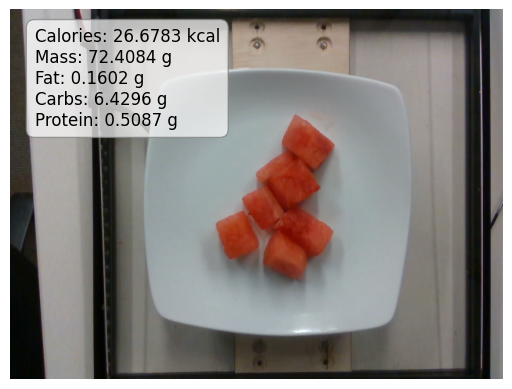

In [19]:
image = np.array(test)

plt.imshow(image)
plt.axis('off')

info_text = f"Calories: {calories.item():.4f} kcal\n" \
            f"Mass: {mass.item():.4f} g\n" \
            f"Fat: {fat.item():.4f} g\n" \
            f"Carbs: {carbs.item():.4f} g\n" \
            f"Protein: {protein.item():.4f} g"

props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.show()